<a href="https://colab.research.google.com/github/akshaykumar2972/POC2025/blob/main/New_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('df_Clustering.csv')

## **Clustering**

In [ ]:
df.columns

Index(['CustomerId', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'EnrolledDate', 'DaysSinceLastPurchase',
       'AmountSpentOnWine', 'AmountSpentOnFruits', 'AmountSpentOnMeatProducts',
       'AmountSpentOnFishProducts', 'AmountSpentOnSweetProducts',
       'AmountSpentOnGoldProducts', 'PurchasesMadeWithDiscounts',
       'PurchasesMadeViaWeb', 'PurchasesMadeViaCatalog',
       'PurchasesMadeDirectly', 'NumberOfVisitsToWebsitePerMonth',
       'IsCampaign3Accepted', 'IsCampaign4Accepted', 'IsCampaign5Accepted',
       'IsCampaign1Accepted', 'IsCampaign2Accepted',
       'HasComplainedInLast2Months', 'IsLastCampaignAccepted', 'Age',
       'TotalAmountSpent', 'TotalPurchasesCount', 'AverageSpendPerPurchase',
       'Recency', 'Frequency', 'Monetary', 'NumberOfDaysAsCustomer',
       'Age_Group', 'OfferAccepted', 'IncomeSegment', 'RFM_Score',
       'CustomerSegment', 'MonthStart', 'MonthLabel', 'RFM_Segment'],
      dtype='object')

#### **Dropping all columns which doesn't add any value for further and created for understanding the dataset**

In [ ]:
df.drop(columns=['CustomerId'
                , 'EnrolledDate'
                , 'Year_Birth'
                , 'Age_Group'
                , 'TotalAmountSpent'
                , 'TotalPurchasesCount'
                , 'AverageSpendPerPurchase'
                , 'Recency'
                , 'Frequency'
                , 'Monetary'
                , 'NumberOfDaysAsCustomer'
                , 'Age_Group'
                , 'OfferAccepted'
                , 'IncomeSegment'], inplace=True, axis=1)

In [ ]:
df.iloc[:5, :15]

,Education,Marital_Status,Income,Kidhome,Teenhome,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog
1255,PhD,Married,55158.0,1,1,72,293,0,87,4,11,23,4,7,2
1363,2n Cycle,Married,52203.0,0,0,36,488,21,238,56,108,28,1,8,7
2029,2n Cycle,Married,7500.0,1,0,98,5,17,17,13,14,34,4,2,1
724,Graduation,Married,7500.0,1,0,19,7,0,12,13,7,32,5,4,1
976,Master,Married,82576.0,0,0,66,1206,55,445,168,18,18,1,2,4


In [ ]:
df.iloc[:5, 15:]

,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsCampaign1Accepted,IsCampaign2Accepted,HasComplainedInLast2Months,IsLastCampaignAccepted,Age,RFM_Score,CustomerSegment,MonthStart,MonthLabel,RFM_Segment
1255,5,7,0,0,0,0,0,0,1,55,8,Potential Loyalists,2012-07-01,Jul - 2012,Others
1363,11,6,0,0,0,0,0,0,0,75,13,Champions,2012-07-01,Jul - 2012,Champions
2029,3,9,0,0,0,0,0,0,0,40,5,At Risk,2012-08-01,Aug - 2012,Sleeping
724,2,9,1,0,0,0,0,0,1,49,9,Loyal Customers,2012-08-01,Aug - 2012,New Customers
976,12,1,0,0,1,0,0,0,0,66,11,Loyal Customers,2012-08-01,Aug - 2012,Loyal


### **Encoding Categorical Variables**

In [ ]:
education_order = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education'] = df['Education'].map(education_order)

In [ ]:
df.drop(columns=['Education'], inplace=True, axis=1)

In [ ]:
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)
df['Marital_Status_Single'] = df['Marital_Status_Single'].astype(int)
df.rename(columns={'Marital_Status_Single': 'IsSingle'}, inplace=True)

### **Feature Transformation: Scaling the features using StandardScaler**

In [ ]:
flag_cols = ['Kidhome'
            , 'Teenhome'
            , 'IsCampaign1Accepted'
            , 'IsCampaign2Accepted'
            , 'IsCampaign3Accepted'
            , 'IsCampaign4Accepted'
            , 'IsCampaign5Accepted'
            , 'IsLastCampaignAccepted'
            , 'HasComplainedInLast2Months'
            , 'IsSingle']
cols_to_scale = ['Income'
                , 'DaysSinceLastPurchase'
                , 'AmountSpentOnWine'
                ,	'AmountSpentOnFruits'
                ,	'AmountSpentOnMeatProducts'
                ,	'AmountSpentOnFishProducts'
                ,	'AmountSpentOnSweetProducts'
                , 'AmountSpentOnGoldProducts'
                , 'PurchasesMadeWithDiscounts'
                ,	'PurchasesMadeViaWeb'
                ,	'PurchasesMadeViaCatalog'
                ,	'PurchasesMadeDirectly'
                ,	'NumberOfVisitsToWebsitePerMonth'
                , 'Age']

In [ ]:
df['Id'] = range(1, len(df) + 1)

In [ ]:
flags_df = df[['Id'] + flag_cols].copy()
to_scale_df = df[['Id'] + cols_to_scale].copy()

In [ ]:
flags_df.head()

,Id,Kidhome,Teenhome,IsCampaign1Accepted,IsCampaign2Accepted,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsLastCampaignAccepted,HasComplainedInLast2Months,IsSingle
1255,1,1,1,0,0,0,0,0,1,0,0
1363,2,0,0,0,0,0,0,0,0,0,0
2029,3,1,0,0,0,0,0,0,0,0,0
724,4,1,0,0,0,1,0,0,1,0,0
976,5,0,0,0,0,0,0,1,0,0,0


In [ ]:
to_scale_df.head()

,Id,Income,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,Age
1255,1,55158.0,72,293,0,87,4,11,23,4,7,2,5,7,55
1363,2,52203.0,36,488,21,238,56,108,28,1,8,7,11,6,75
2029,3,7500.0,98,5,17,17,13,14,34,4,2,1,3,9,40
724,4,7500.0,19,7,0,12,13,7,32,5,4,1,2,9,49
976,5,82576.0,66,1206,55,445,168,18,18,1,2,4,12,1,66


In [ ]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(to_scale_df[cols_to_scale])

In [ ]:
scaled_df = pd.DataFrame(scaled_array, columns=cols_to_scale)

In [ ]:
scaled_df['Id'] = to_scale_df['Id']

In [ ]:
df_final = pd.merge(scaled_df, flags_df, on='Id')

In [ ]:
df_final.drop('Id', axis=1, inplace=True)

<Axes: >

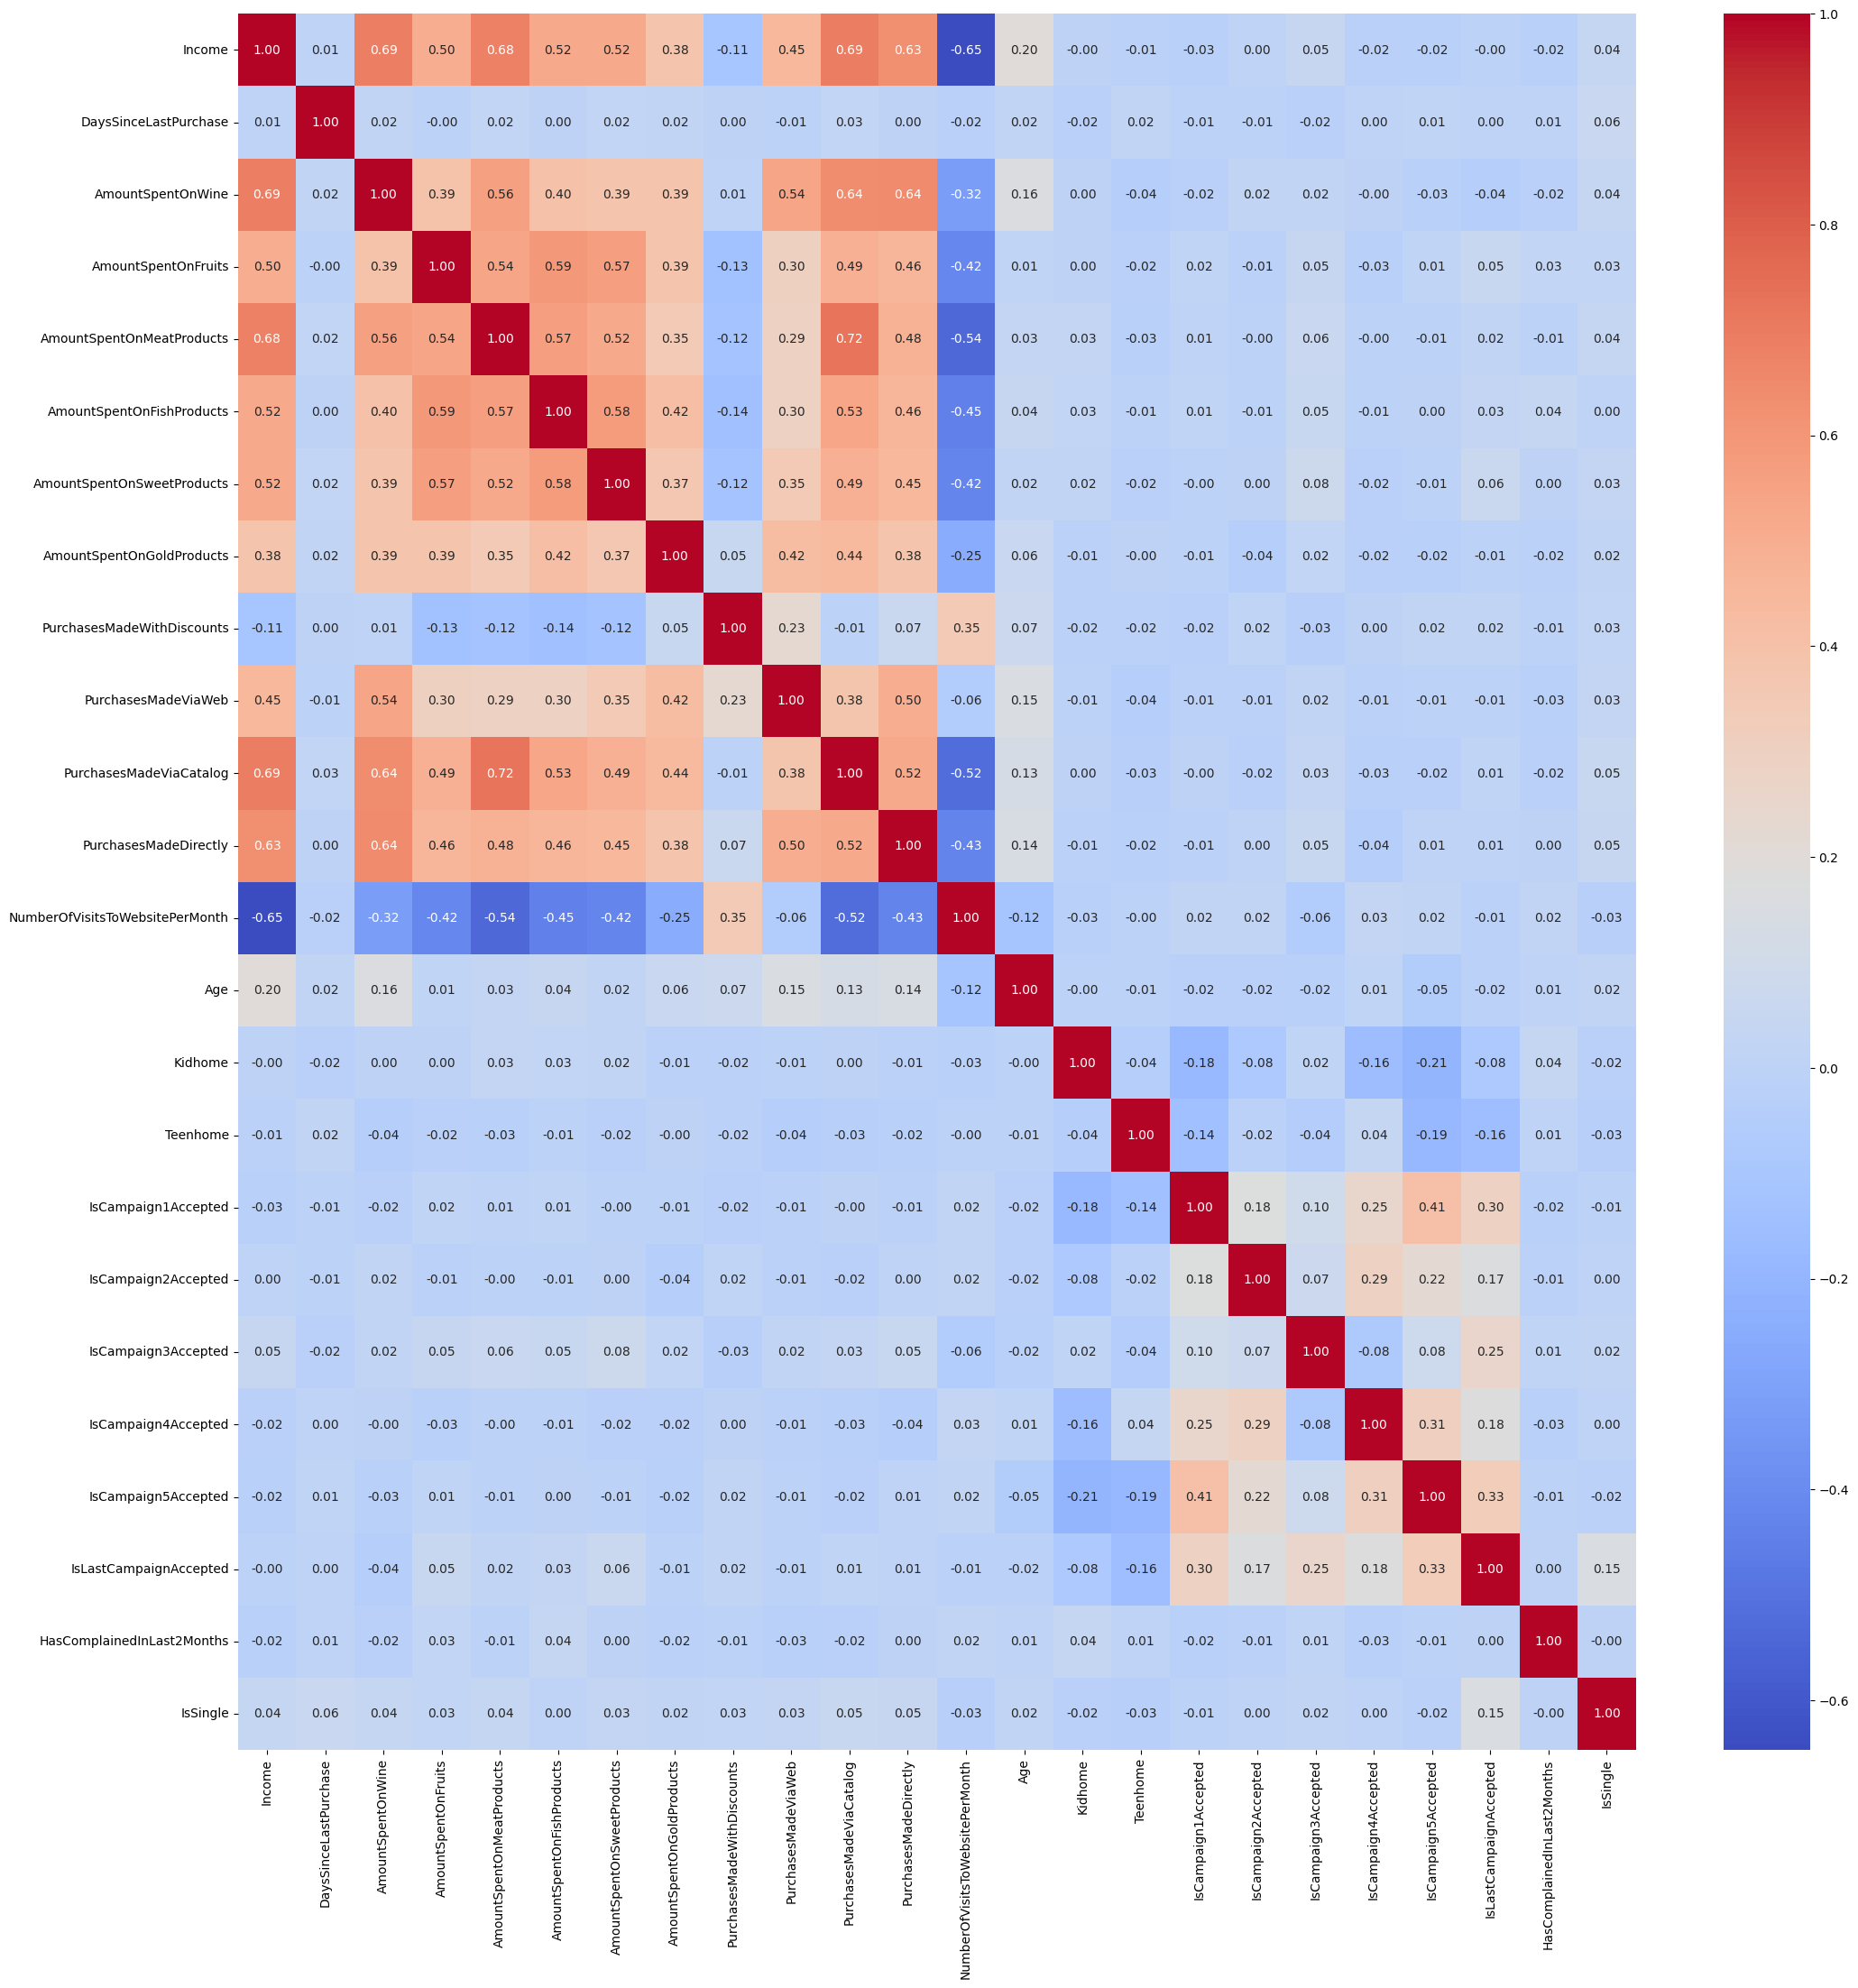

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# # Step 1: Create features that are good predictors of income
# df['Age'] = 2025 - df['Year_Birth']
# df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# # Step 2: Select relevant columns
# features = ['Age', 'Education', 'Marital_Status', 'TotalChildren', 'Recency']
# df_model = df[features + ['Income']].copy()

# # Step 3: Encode categorical features
# df_model = pd.get_dummies(df_model, columns=['Education', 'Marital_Status'], drop_first=True)

# # Step 4: Split known and missing
# train_data = df_model[df_model['Income'].notnull()]
# predict_data = df_model[df_model['Income'].isnull()]

# # Step 5: Train model
# X_train = train_data.drop('Income', axis=1)
# y_train = train_data['Income']
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Step 6: Predict missing values
# X_pred = predict_data.drop('Income', axis=1)
# predicted_income = model.predict(X_pred)

# # Step 7: Fill back the predictions
# df.loc[df['Income'].isnull(), 'Income'] = predicted_income

In [ ]:
X_scaled = df_final.copy()

In [ ]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [ ]:
pca.explained_variance_

array([5.82616356, 1.56631824, 1.08346929, 1.00052509, 0.80061143,
       0.67199368, 0.62786488, 0.51592144, 0.45097481, 0.40108306,
       0.35611589, 0.31083846, 0.30319809, 0.26452783, 0.24888158,
       0.22856003, 0.17926862, 0.14079351, 0.07881934, 0.05543347,
       0.04496348, 0.03707978, 0.01143554, 0.00879812])

In [ ]:
pca.explained_variance_ratio_

array([0.3829566 , 0.10295487, 0.07121697, 0.06576501, 0.05262458,
       0.04417048, 0.04126987, 0.03391177, 0.0296428 , 0.02636339,
       0.02340767, 0.02043157, 0.01992936, 0.01738754, 0.01635911,
       0.01502336, 0.01178341, 0.00925443, 0.00518083, 0.00364367,
       0.00295547, 0.00243727, 0.00075166, 0.0005783 ])

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.3829566  0.48591147 0.55712844 0.62289345 0.67551803 0.71968851
 0.76095837 0.79487014 0.82451294 0.85087633 0.874284   0.89471557
 0.91464493 0.93203247 0.94839158 0.96341494 0.97519836 0.98445278
 0.98963362 0.99327729 0.99623276 0.99867003 0.9994217  1.        ]


Text(0.5, 1.0, 'Cumulative Explained Variance vs. Number of Components')

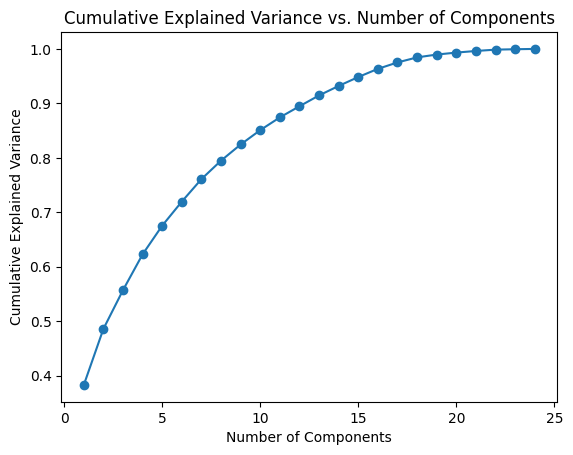

In [ ]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')

In [ ]:
n_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components for 90% variance: {n_components}")

Number of components for 90% variance: 13


In [ ]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=101, n_init=10)
clusters = kmeans.fit_predict(X_pca)

In [ ]:
df_final['cluster'] = clusters

In [ ]:
df_final.iloc[:5,-1:]

,cluster
0,2
1,3
2,1
3,1
4,3


In [ ]:
print("Cluster distribution:")
df_final['cluster'].value_counts()

Cluster distribution:


,count
cluster,
1,1008
2,501
3,432
0,291


In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

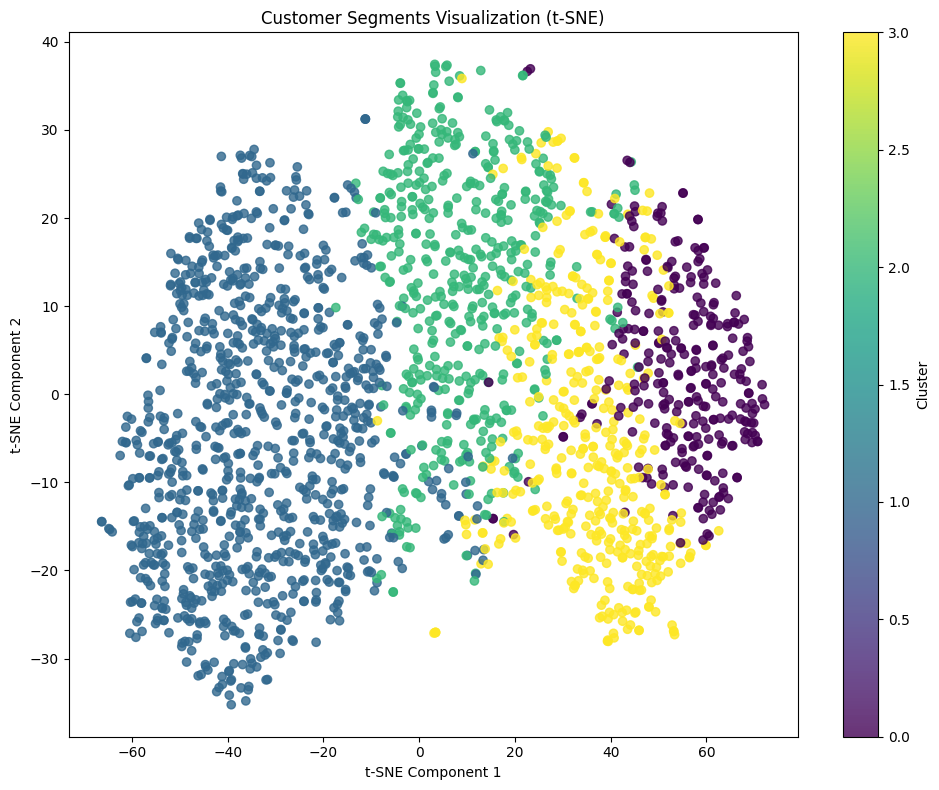

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Segments Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()